## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = \arg\max_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here (5 points)**   

##################################     
TODO: Derive you answer hear
#################################
                              
                        

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [2]:
iris = datasets.load_iris()
X:np.ndarray = iris.data
print(type(X))
y = iris.target
y:np.ndarray = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [3]:
# split the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train:np.ndarray
X_test:np.ndarray
y_train:np.ndarray
y_test:np.ndarray
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  y_train.shape)

print(type(y_train))

X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (105,)
<class 'numpy.ndarray'>


In [14]:
class MultiClsPLA(object):

    # We recommend to absorb the bias into weight.  W = [w, b]

    def __init__(self, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray, lr: float, num_epoch: int, weight_dimension: int, num_cls: int):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.weight = self.initial_weight(weight_dimension, num_cls)
        self.sample_mean = np.mean(self.X_train, 0)
        self.sample_std = np.std(self.X_train, 0)
        self.num_epoch = num_epoch
        self.lr = lr  # learning rate
        self.total_acc_train = []
        self.total_acc_tst = []
        self.__num = 0

    def initial_weight(self, weight_dimension: int, num_cls: int):
        weight = None
        #########################################
        ##  ToDO: Initialize the weight with   ##
        ##  small std and zero mean gaussian   ##
        #########################################
        mean = 0
        variance = 0.01
        weight = np.random.normal(mean, np.sqrt(
            variance), (weight_dimension+1, num_cls))  # absorb the bias
        return weight

    def data_preprocessing(self, data: np.ndarray) -> np.ndarray:
        #####################################
        ##  ToDO: Normlize the data        ##
        #####################################
        norm_data = (data-self.sample_mean)/self.sample_std
        return norm_data

    def __softmax(self,x: np.ndarray, axis=1) -> np.ndarray:
        x_max = np.amax(x, axis=axis, keepdims=True)
        temp = np.exp(x-x_max)
        return temp/np.sum(temp, axis=axis, keepdims=True)

    def __update_weight(self, X_train: np.ndarray, y_train: np.ndarray):
        # caculate loss
        N = X_train.shape[0]
        temp: np.ndarray = np.dot(X_train, self.weight)  # shape (N, C)
        output = self.__softmax(temp, axis=1)

        labels_onehot = np.zeros(output.shape)
        labels_onehot[np.arange(N), y_train] = 1.0
        grad_w: np.ndarray = np.dot(X_train.T, output-labels_onehot)/N
        # update
        self.weight -= self.lr*grad_w
        pass

    def train_step(self, X_train: np.ndarray, y_train: np.ndarray, shuffle_idx: np.ndarray) -> float:
        np.random.shuffle(shuffle_idx)
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]
        train_acc = None
        
        ##############################################
        ## TODO: to implement the training process  ##
        ## and update the weights                   ##
        ##############################################
        self.__update_weight(X_train, y_train)
        temp = np.dot(X_train, self.weight)
        predictions = np.argmax(temp, axis=1)
        train_acc = np.mean(predictions == y_train)

        return train_acc

    def test_step(self, X_test: np.ndarray, y_test: np.ndarray) -> float:
        X_test = self.data_preprocessing(data=X_test)
        num_sample = X_test.shape[0]
        test_acc = None

        #########################################
        ##  ToDO: Evaluate the test set and    ##
        ##  return the test acc                ##
        #########################################
        X_test = np.hstack((X_test, np.ones((num_sample, 1))))
        temp = np.dot(X_test, self.weight)  # matrix like [[1,2,3],[1,3,4]]
        predictions: np.ndarray = np.argmax(temp, axis=1)
        test_acc: float = np.mean(predictions == y_test)
        return test_acc

    def train(self):
        self.X_train = self.data_preprocessing(data=self.X_train)
        num_sample = self.X_train.shape[0]

        ######################################################
        ### TODO: In order to absorb the bias into weights ###
        ###  we need to modify the input data.             ###
        ###  So You need to transform the input data       ###
        ######################################################
        num_test=self.X_test.shape[0]
        if (self.__num == 0):
            self.X_train = np.hstack(
                (self.X_train, np.ones((num_sample, 1))))  # add one
            self.__num += 1

        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(
                X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)
            tst_acc = self.test_step(X_test=self.X_test,  y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            print('epoch:', epoch, 'traing_acc:%.3f' %
                  training_acc, 'tst_acc:%.3f' % tst_acc)

    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        tst_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(tst_acc)
        plt.legend(['train_acc', 'tst_acc'])
        plt.show()

epoch: 0 traing_acc:0.695 tst_acc:0.600
epoch: 1 traing_acc:0.714 tst_acc:0.622
epoch: 2 traing_acc:0.752 tst_acc:0.622
epoch: 3 traing_acc:0.790 tst_acc:0.667
epoch: 4 traing_acc:0.829 tst_acc:0.711
epoch: 5 traing_acc:0.838 tst_acc:0.711
epoch: 6 traing_acc:0.857 tst_acc:0.711
epoch: 7 traing_acc:0.857 tst_acc:0.711
epoch: 8 traing_acc:0.867 tst_acc:0.711
epoch: 9 traing_acc:0.867 tst_acc:0.733
epoch: 10 traing_acc:0.867 tst_acc:0.756
epoch: 11 traing_acc:0.867 tst_acc:0.778
epoch: 12 traing_acc:0.867 tst_acc:0.778
epoch: 13 traing_acc:0.867 tst_acc:0.778
epoch: 14 traing_acc:0.867 tst_acc:0.778
epoch: 15 traing_acc:0.867 tst_acc:0.778
epoch: 16 traing_acc:0.867 tst_acc:0.800
epoch: 17 traing_acc:0.867 tst_acc:0.822
epoch: 18 traing_acc:0.867 tst_acc:0.822
epoch: 19 traing_acc:0.867 tst_acc:0.822
epoch: 20 traing_acc:0.876 tst_acc:0.822
epoch: 21 traing_acc:0.886 tst_acc:0.822
epoch: 22 traing_acc:0.886 tst_acc:0.822
epoch: 23 traing_acc:0.886 tst_acc:0.822
epoch: 24 traing_acc:0.886

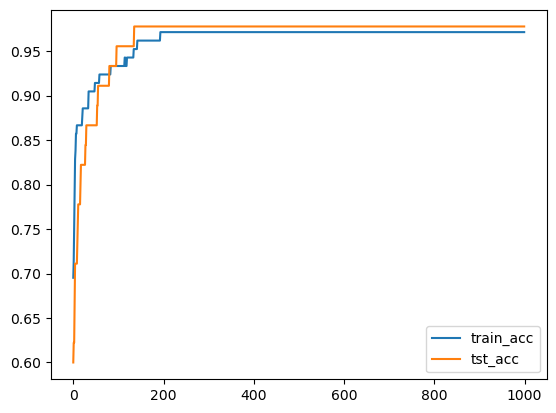

In [15]:
np.random.seed(0)
random.seed(0)
#######################################################
# TODO:
# 1. You need to import the model and pass some parameters.
# 2. Then training the model with some epoches.
# 3. Visualize the training acc and test acc verus epoches

mc_pla = MultiClsPLA(X_train, y_train, X_test, y_test,
                     0.3, 1000, X_train.shape[1], 3)
mc_pla.train()
mc_pla.vis_acc_curve()